Plots saved to plots directory


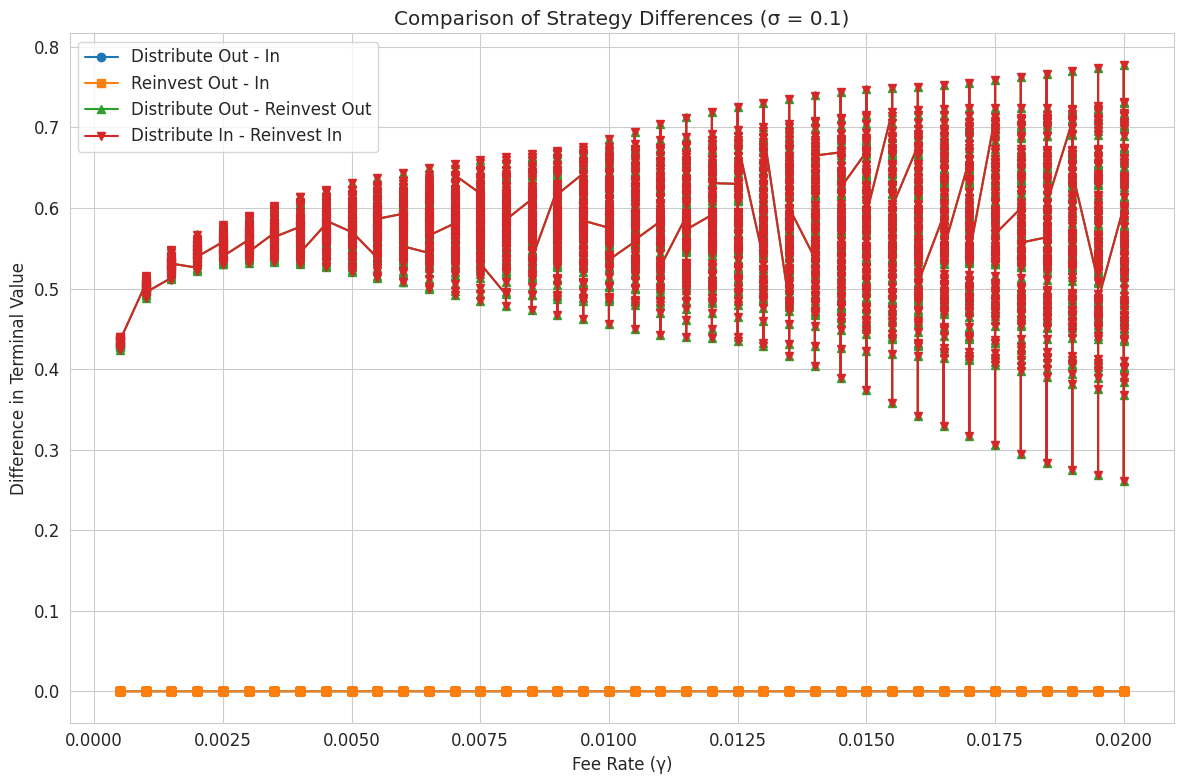

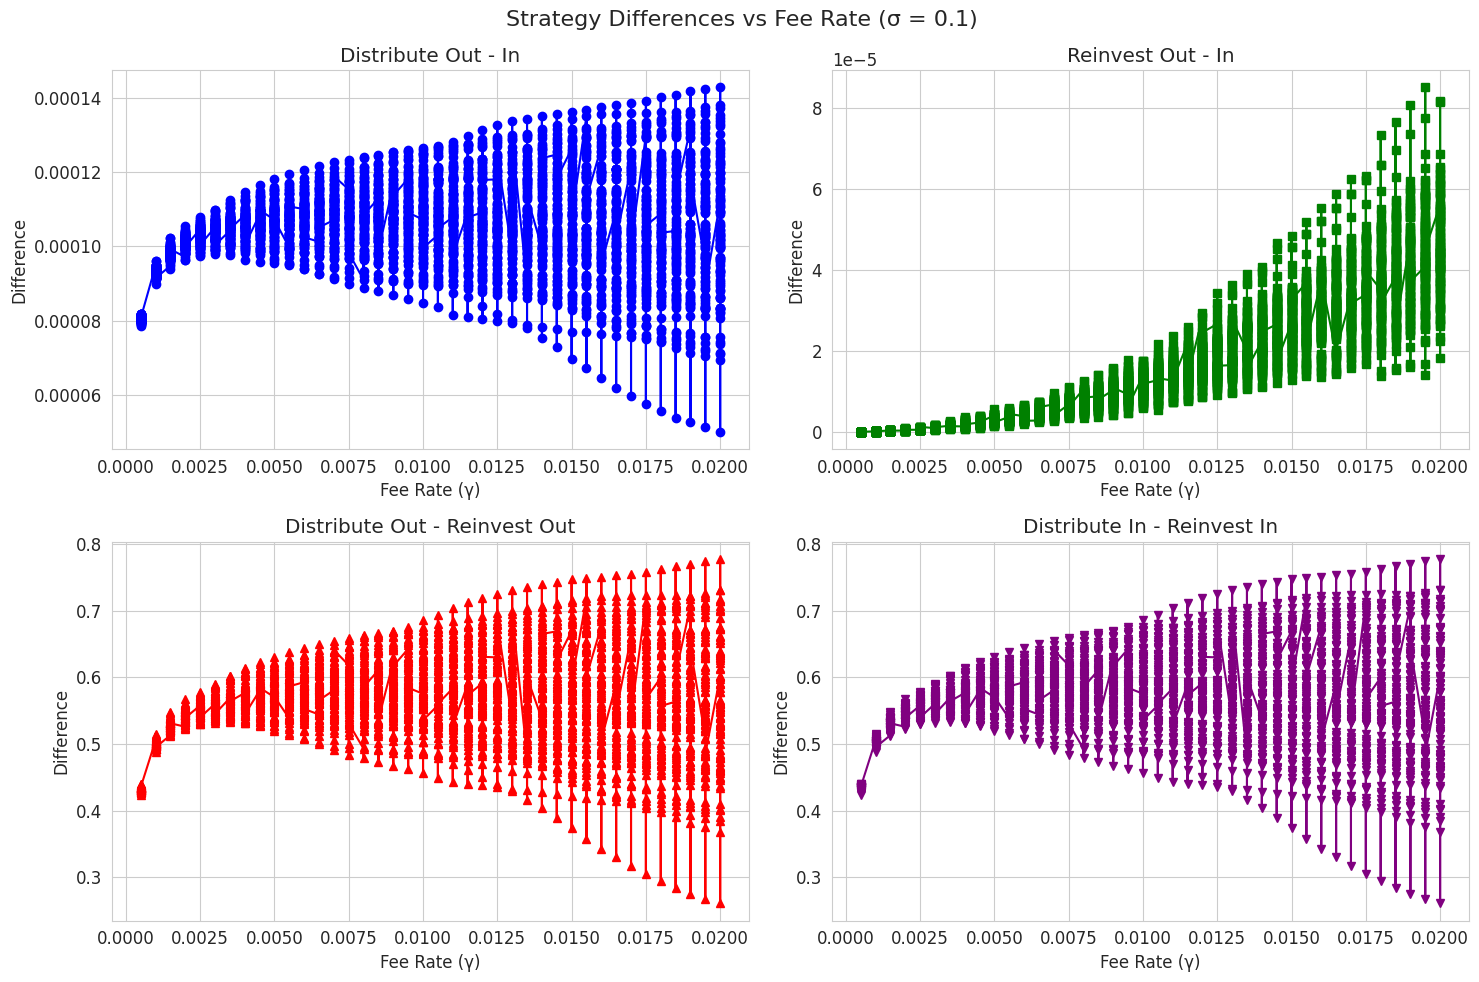

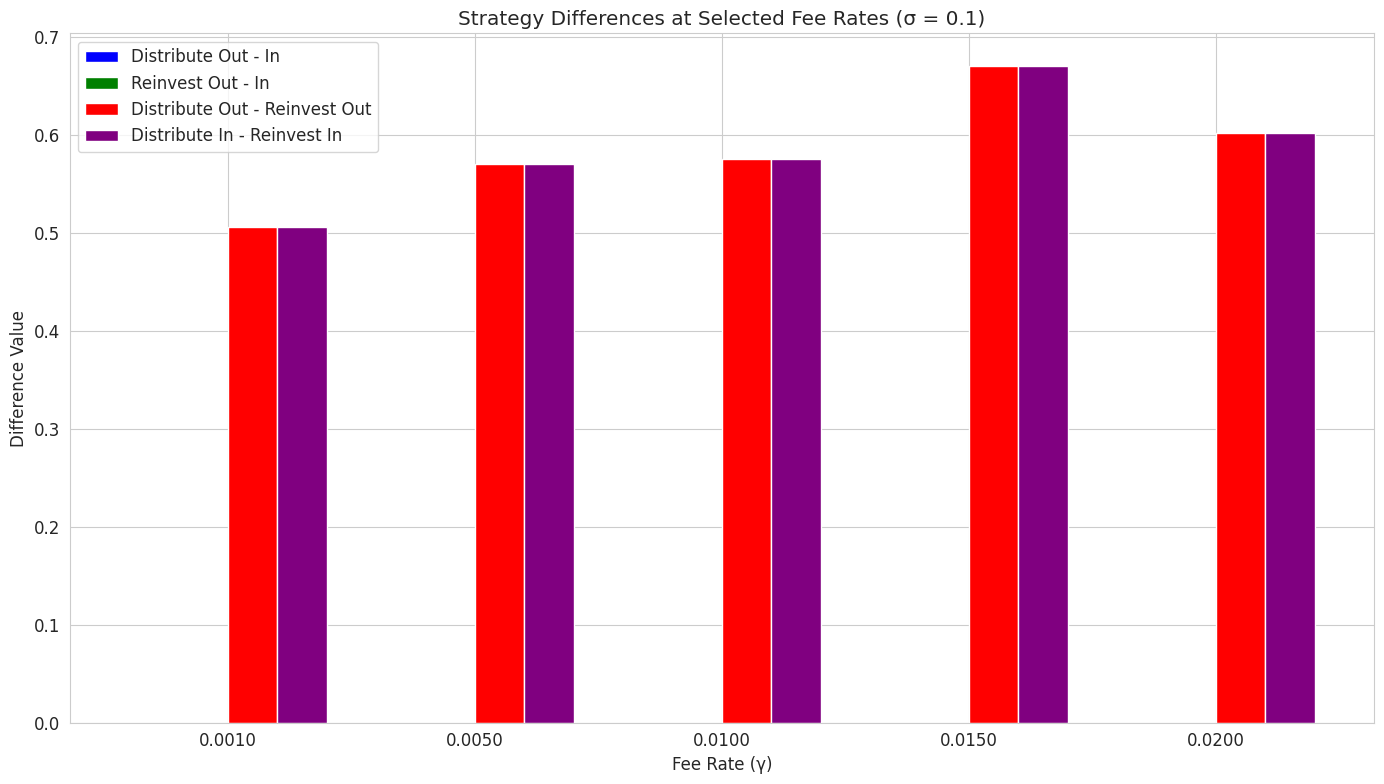

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

def plot_differences(file_path, output_dir="plots"):
    """
    Create visualization of difference metrics vs gamma
    
    Parameters:
    -----------
    file_path : str
        Path to the CSV results file
    output_dir : str
        Directory to save the plots
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Get sigma value from first row
    sigma = df.iloc[0]['sigma']
    
    # Plot 1: All differences on one plot
    plt.figure()
    plt.plot(df['gamma'], df['diff_dis_out_in'], 'o-', label='Distribute Out - In')
    plt.plot(df['gamma'], df['diff_re_out_in'], 's-', label='Reinvest Out - In')
    plt.plot(df['gamma'], df['diff_dis_out_re_out'], '^-', label='Distribute Out - Reinvest Out')
    plt.plot(df['gamma'], df['diff_dis_in_re_in'], 'v-', label='Distribute In - Reinvest In')
    
    plt.xlabel('Fee Rate (γ)')
    plt.ylabel('Difference in Terminal Value')
    plt.title(f'Comparison of Strategy Differences (σ = {sigma})')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/all_differences_sigma_{sigma}.png", dpi=300)
    
    # Plot 2: Individual subplots for better visibility
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Distribute Out - In
    axes[0, 0].plot(df['gamma'], df['diff_dis_out_in'], 'o-', color='blue')
    axes[0, 0].set_title('Distribute Out - In')
    axes[0, 0].set_xlabel('Fee Rate (γ)')
    axes[0, 0].set_ylabel('Difference')
    
    # Reinvest Out - In
    axes[0, 1].plot(df['gamma'], df['diff_re_out_in'], 's-', color='green')
    axes[0, 1].set_title('Reinvest Out - In')
    axes[0, 1].set_xlabel('Fee Rate (γ)')
    axes[0, 1].set_ylabel('Difference')
    
    # Distribute Out - Reinvest Out
    axes[1, 0].plot(df['gamma'], df['diff_dis_out_re_out'], '^-', color='red')
    axes[1, 0].set_title('Distribute Out - Reinvest Out')
    axes[1, 0].set_xlabel('Fee Rate (γ)')
    axes[1, 0].set_ylabel('Difference')
    
    # Distribute In - Reinvest In
    axes[1, 1].plot(df['gamma'], df['diff_dis_in_re_in'], 'v-', color='purple')
    axes[1, 1].set_title('Distribute In - Reinvest In')
    axes[1, 1].set_xlabel('Fee Rate (γ)')
    axes[1, 1].set_ylabel('Difference')
    
    plt.suptitle(f'Strategy Differences vs Fee Rate (σ = {sigma})', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.savefig(f"{output_dir}/individual_differences_sigma_{sigma}.png", dpi=300)
    
    # Plot 3: Bar chart comparing strategies at select gamma values
    # Select a few representative gamma values and find closest matches in data
    target_gammas = [0.001, 0.005, 0.01, 0.015, 0.02]
    
    # Get actual gamma values from the dataframe (closest to targets)
    actual_gammas = []
    selected_indices = []
    
    for target in target_gammas:
        # Find the closest gamma value in the dataframe
        idx = (df['gamma'] - target).abs().idxmin()
        selected_indices.append(idx)
        actual_gammas.append(df.loc[idx, 'gamma'])
    
    # Create filtered dataframe with only the selected rows
    filtered_df = df.iloc[selected_indices].copy()
    
    # Create a grouped bar chart
    fig, ax = plt.subplots(figsize=(14, 8))
    
    bar_width = 0.2
    index = np.arange(len(actual_gammas))
    
    # Plot bars for each difference metric
    ax.bar(index - 1.5*bar_width, filtered_df['diff_dis_out_in'], bar_width, 
           label='Distribute Out - In', color='blue')
    ax.bar(index - 0.5*bar_width, filtered_df['diff_re_out_in'], bar_width, 
           label='Reinvest Out - In', color='green')
    ax.bar(index + 0.5*bar_width, filtered_df['diff_dis_out_re_out'], bar_width, 
           label='Distribute Out - Reinvest Out', color='red')
    ax.bar(index + 1.5*bar_width, filtered_df['diff_dis_in_re_in'], bar_width, 
           label='Distribute In - Reinvest In', color='purple')
    
    ax.set_xlabel('Fee Rate (γ)')
    ax.set_ylabel('Difference Value')
    ax.set_title(f'Strategy Differences at Selected Fee Rates (σ = {sigma})')
    ax.set_xticks(index)
    ax.set_xticklabels([f'{g:.4f}' for g in actual_gammas])
    ax.legend()
    
    plt.tight_layout()
    plt.savefig(f"{output_dir}/bar_differences_sigma_{sigma}.png", dpi=300)
    
    print(f"Plots saved to {output_dir} directory")

if __name__ == "__main__":
    # Path to your results file
    file_path = "/home/shiftpub/Dynamic_AMM/inf_step_exp/mc_approach/mc_results/results_0.1.csv"
    
    # Generate visualizations
    plot_differences(file_path)

NameError: name 'combined_df' is not defined

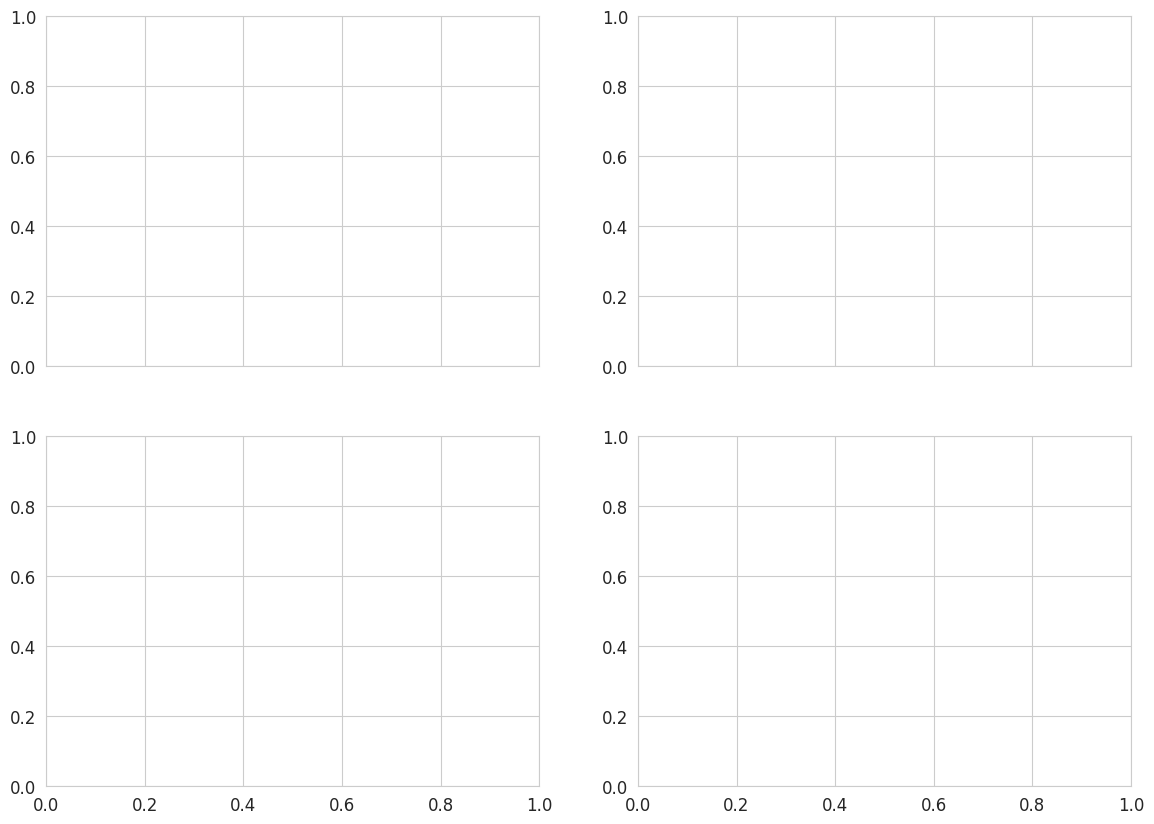

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sigmas = [0.2, 0.4, 0.6, 0.8]

# Setup 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

# Flatten axes for easy iteration
axes_flat = axes.flatten()

# Plot each sigma separately
for i, sigma in enumerate(sigmas):
    ax = axes_flat[i]
    subset = combined_df[combined_df['sigma'] == sigma]
    
    # Use Seaborn's scatterplot with Pandas DataFrame
    sns.scatterplot(
        data=subset,
        x='gamma',
        y='fee_value',
        ax=ax,
        label=f"σ = {sigma}"
    )

    ax.set_title(f"Sigma = {sigma}", fontsize=14)
    ax.set_xlabel("Gamma (Fee Rate)", fontsize=12)
    ax.set_ylabel("Fee Revenue", fontsize=12)
    ax.grid(True)
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()